In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [11]:
tracks = pd.read_csv('songs_normalize (1).csv')
print("Head: ")
print(tracks.head())
# shows numbers of rows and columns
print("Shape: ")
print(tracks.shape)

Head: 
           artist                    song  explicit  duration_ms  year  \
0  Britney Spears  Oops!...I Did It Again     False       211160  2000   
1       blink-182    All The Small Things     False       167066  1999   
2      Faith Hill                 Breathe     False       250546  1999   
3        Bon Jovi            It's My Life     False       224493  2000   
4          *NSYNC             Bye Bye Bye     False       200560  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.0000

In [12]:
# check if there are null values in the columns of our data frame
tracks.info()
# calculating number of null values
print(tracks.isnull().sum())
# if present then dropping them
tracks.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   explicit          2000 non-null   bool   
 3   duration_ms       2000 non-null   int64  
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


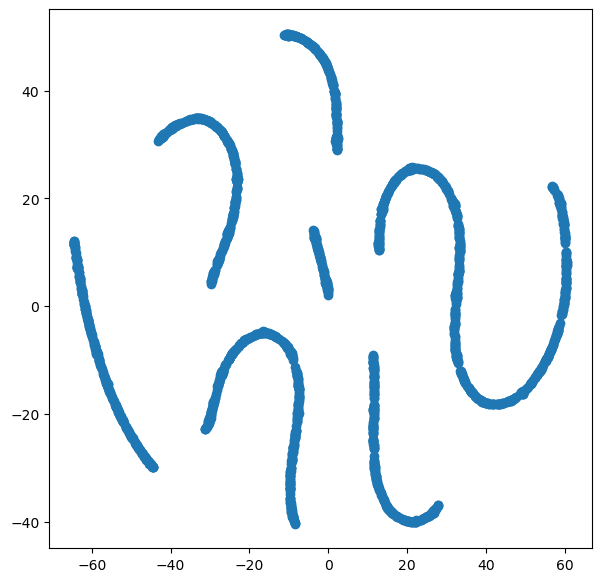

In [13]:
# t-SNE is an algorithm that can convert high dimensional data to low dimensions
x = tracks.iloc[:, 3:17]
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(x.head(2000))
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [14]:
# shows unique songs in dataset:
print("shows unique songs in dataset: ")
print(tracks['song'].nunique(), tracks.shape)

shows unique songs in dataset: 
1879 (2000, 18)


In [15]:
# sorting tracks according to popularity
tracks = tracks.sort_values(by=['popularity'], ascending=False)
print(tracks.head)
print(tracks.drop_duplicates(subset=['song'], keep='first', inplace=True))

<bound method NDFrame.head of                  artist                 song  explicit  duration_ms  year  \
1322  The Neighbourhood      Sweater Weather     False       240400  2013   
1311          Tom Odell         Another Love      True       244360  2013   
201              Eminem           Without Me      True       290320  2002   
1613             WILLOW       Wait a Minute!     False       196520  2015   
6                Eminem  The Real Slim Shady      True       284200  2000   
...                 ...                  ...       ...          ...   ...   
1637      Ariana Grande         Side To Side      True       226160  2016   
217             Aaliyah        Rock The Boat     False       275026  2019   
1631            Tove Lo            Cool Girl      True       197815  2016   
1626        Cheat Codes                  Sex     False       228361  2016   
126      Jennifer Lopez       Ain't It Funny     False       246160  2001   

      popularity  danceability  energy  key  

In [16]:
# findng coloums containing float values
floats = []
for col in tracks.columns:
    if tracks[col].dtype == 'float':
        floats.append(col)

Number of coloums containing float values: 
9


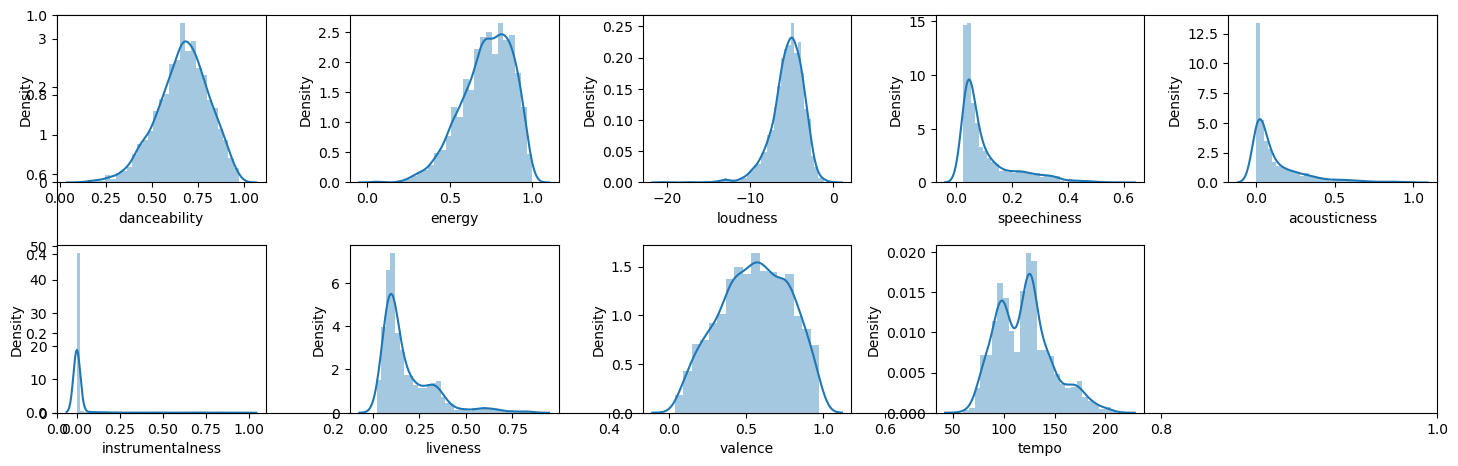

In [17]:
# plotting its graph
print("Number of coloums containing float values: ")
print(len(floats))
plt.subplots(figsize=(15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [18]:
# predicting popularity of songs
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genre'])
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(1000)

def get_similarities(song_name, data):
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['song'] == song_name]['genre']).toarray()
    num_array1 = data[data['song'] == song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['song']

        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['song'] == name]['genre']).toarray()
        num_array2 = data[data['song'] == name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim


def recommend_songs(song_name, data=tracks):
    # Base case
    if tracks[tracks['song'] == song_name].shape[0] == 1:
        print('This song is either not so popular or you\ have entered invalid_name.\n Some songs you may like:\n')

    for song1 in data.sample(n=5)['song'].values:
        print(song1)

    return
    data['similarity_factor'] = get_similarities(song_name, data)
    data.sort_values(by=['similarity_factor', 'popularity'], ascending=[False, False], inplace=True)

    # First song will be the input song itself as the similarity will be highest.



pickle.dump(tracks, open('songs.pkl', 'wb'))
pickle.dump(tracks.to_dict(), open('song_dict.pkl', 'wb'))
pickle.dump(recommend_songs('song',tracks), open('similarity.pkl', 'wb'))


Habits (Stay High)
Lose Yourself to Dance (feat. Pharrell Williams)
Faded
Him & I (with Halsey)
Tuesday (feat. Danelle Sandoval)
